In [1]:
import pickle
from pathlib import Path
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import ttest_1samp

In [3]:
import seaborn as sns
import numpy as np

In [30]:
bcounts = []
for i in [1,2,3]:
    files_path = Path("data/bcounts/underlying_"+str(i))
    for element in files_path.glob("*/bcounts.pkl"):
        bcounts.append(pickle.load(open(element, 'rb')))

In [32]:
samples = [elem[3][1][0] for elem in bcounts]

<AxesSubplot:ylabel='Count'>

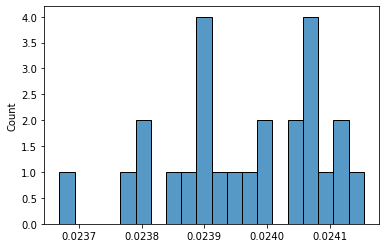

In [34]:
sns.histplot(samples, bins=20)

In [5]:
column_bcounts = pickle.load(open(Path("data/bcounts/column").glob("**/bcounts.pkl").__next__(),'rb'))

In [6]:
def compute_ostt(bcounts, colum_bcounts, max_dim = 10):
    statistic_matrices = []
    pvalue_matrices = []
    diff_matrices = []
    for dimension in range(1,max_dim+1):
        statistic = np.zeros((dimension+1, dimension+1))
        pvalues = np.zeros((dimension+1, dimension+1))
        diff = np.zeros((dimension+1, dimension+1))
        for i in range(dimension):
            for j in range(i+1):
                hyp = column_bcounts[dimension][i+1][j]
                samples = [elem[dimension][i+1][j] for elem in bcounts]
                result = ttest_1samp(samples, hyp)
                statistic[i+1][j] = result[0]
                pvalues[i+1][j] = np.log10(result[1])
                diff[i+1][j] = np.average(samples) - hyp
        statistic[statistic == 0] = np.nan
        pvalues[pvalues == 0] = np.nan
        diff[diff == 0] = np.nan
        statistic_matrices.append(statistic)
        pvalue_matrices.append(pvalues)
        diff_matrices.append(diff)
    return statistic_matrices, pvalue_matrices, diff_matrices

In [7]:
def plot_ostt(statistic_matrices, pvalue_matrices, diff_matrices, max_dim = 6, name = "ostt"):
    for dimension in range(1,max_dim+1):

        dvalue = np.nanmax(np.absolute(diff_matrices[dimension]))
        svalue = np.nanmax(np.absolute(statistic_matrices[dimension]))
        fig, axes = plt.subplots(1,3, figsize = (15,6))
        sns.heatmap(diff_matrices[dimension], cmap = cm.get_cmap('bwr'), ax = axes[0], annot = True,
                   vmin = -dvalue, vmax = dvalue)
        sns.heatmap(statistic_matrices[dimension], cmap = cm.get_cmap('bwr'), ax = axes[1], annot = True,
                   vmin = -svalue, vmax = svalue)
        sns.heatmap(pvalue_matrices[dimension], cmap = cm.get_cmap('viridis'), ax = axes[2], annot = True)
        axes[0].set_title('Difference in count')
        axes[1].set_title('Difference in statistic')
        axes[2].set_title('Log of pvalue')
        fig.savefig(name+str(dimension), facecolor = 'white')

<ipython-input-7-be9610a6d7c2>:4: RuntimeWarning: All-NaN slice encountered
  dvalue = np.nanmax(np.absolute(diff_matrices[dimension]))
<ipython-input-7-be9610a6d7c2>:5: RuntimeWarning: All-NaN slice encountered
  svalue = np.nanmax(np.absolute(statistic_matrices[dimension]))
/home/paperspace/miniconda3/envs/thesis38/lib/python3.8/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/paperspace/miniconda3/envs/thesis38/lib/python3.8/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


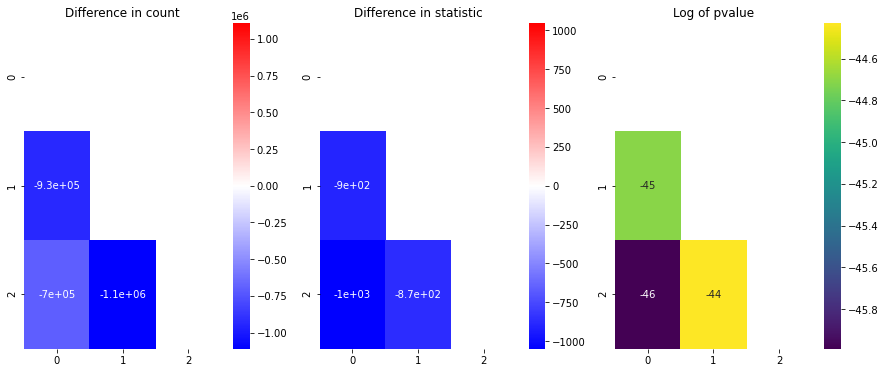

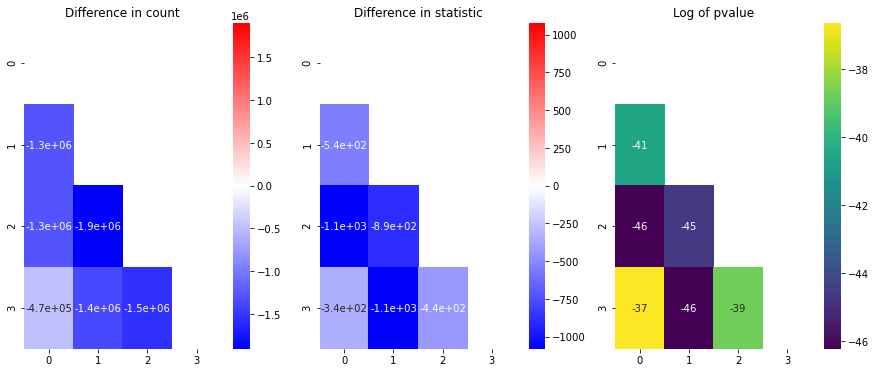

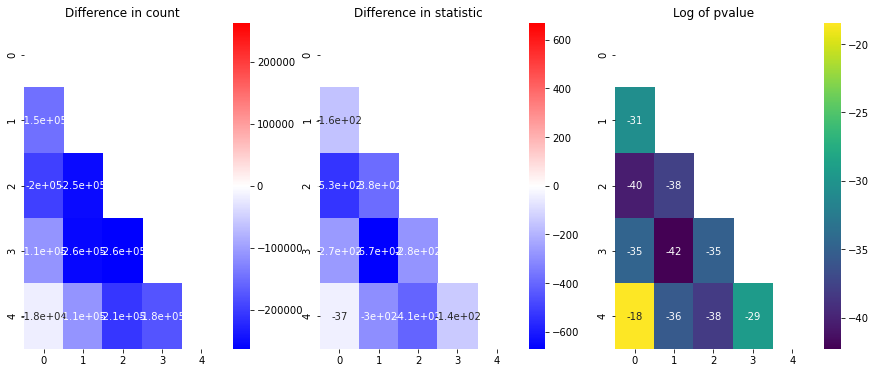

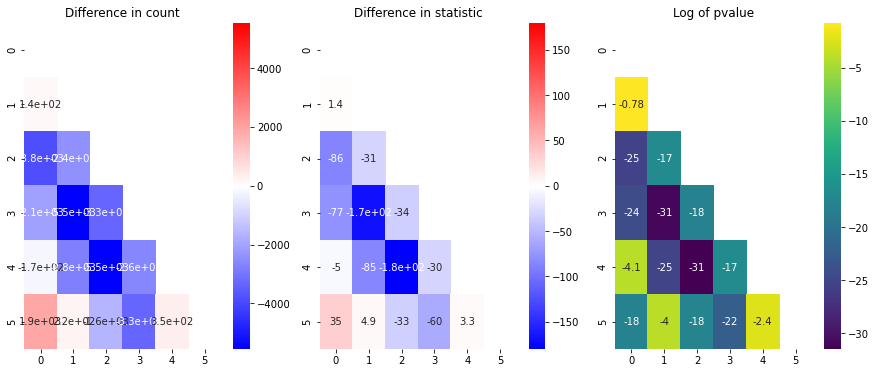

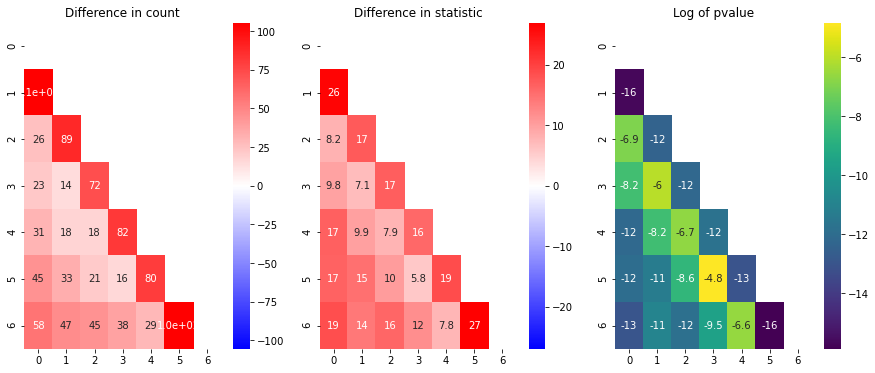

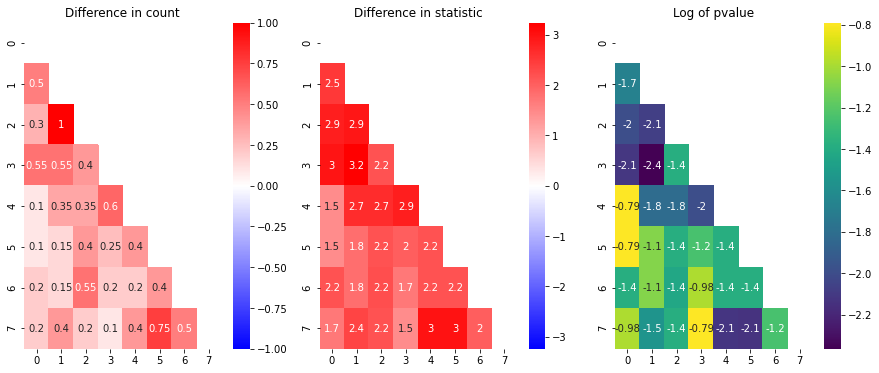

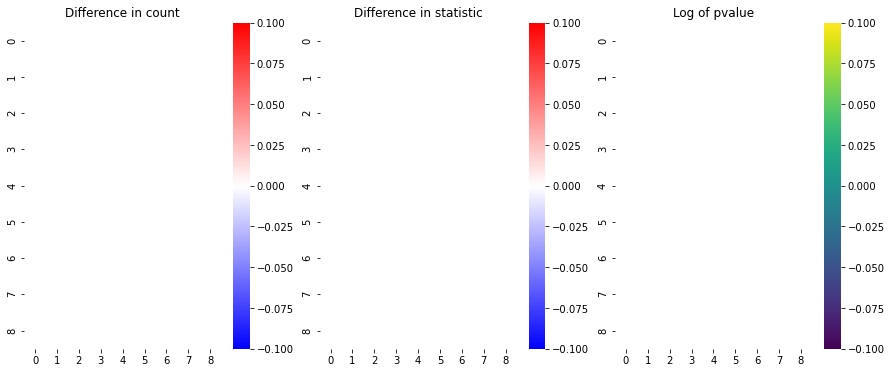

In [8]:
s, p, d = compute_ostt(bcounts, column_bcounts)
plot_ostt(s, p, d, 7, "ttest_absolute")

In [9]:
def normalize_matrix(m):
    return m/m[0][-1]

In [31]:
for count in bcounts:
    for key in count.keys():
        count[key] = normalize_matrix(count[key])

<ipython-input-9-7c2800ae6978>:2: RuntimeWarning: invalid value encountered in true_divide
  return m/m[0][-1]


In [11]:
for key in column_bcounts.keys():
    column_bcounts[key] = normalize_matrix(column_bcounts[key])

<ipython-input-9-7c2800ae6978>:2: RuntimeWarning: invalid value encountered in true_divide
  return m/m[0][-1]


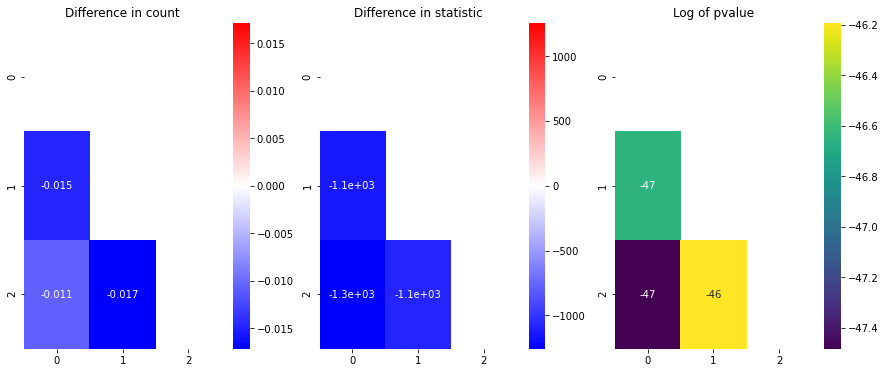

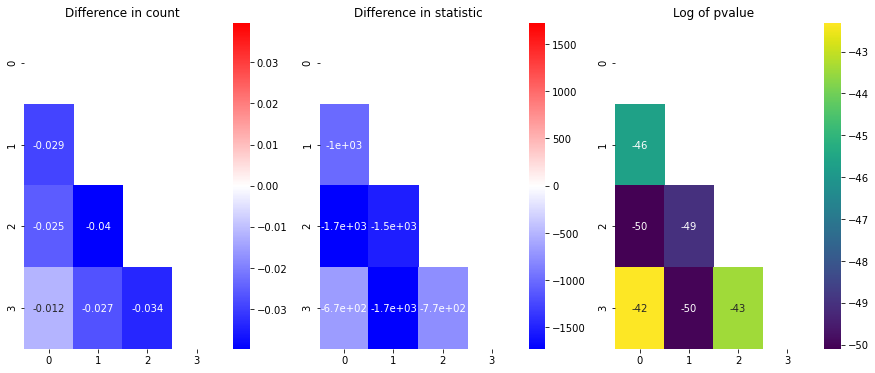

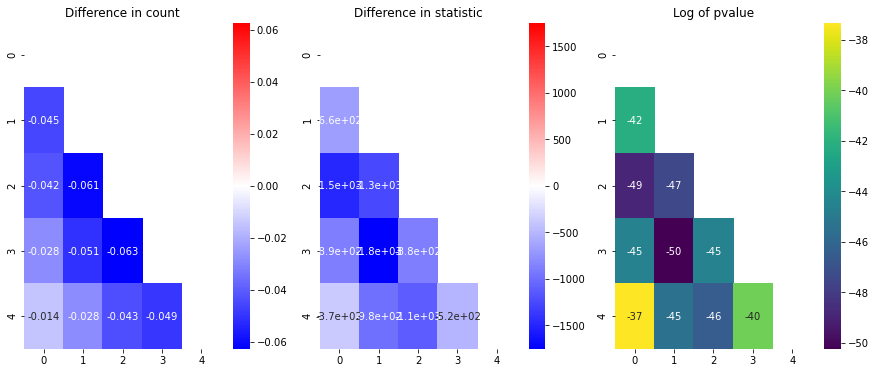

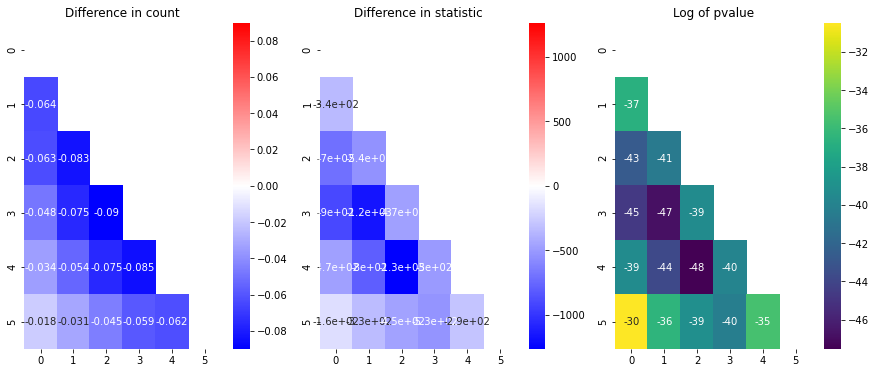

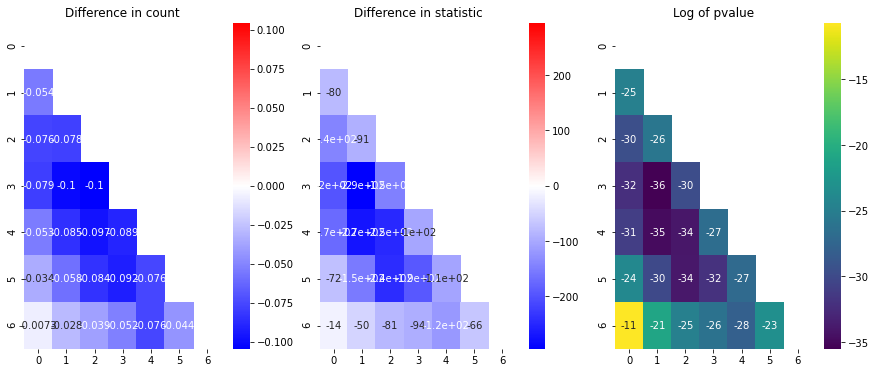

In [12]:
s, p, d = compute_ostt(bcounts, column_bcounts)
plot_ostt(s, p, d, 5, "ttest_normalized")

In [13]:
def percentize_matrix(m):
    return m/np.sum(np.tril(m))

In [14]:
for count in bcounts:
    for key in count.keys():
        count[key] = percentize_matrix(count[key])

In [15]:
for key in column_bcounts.keys():
    column_bcounts[key] = percentize_matrix(column_bcounts[key])

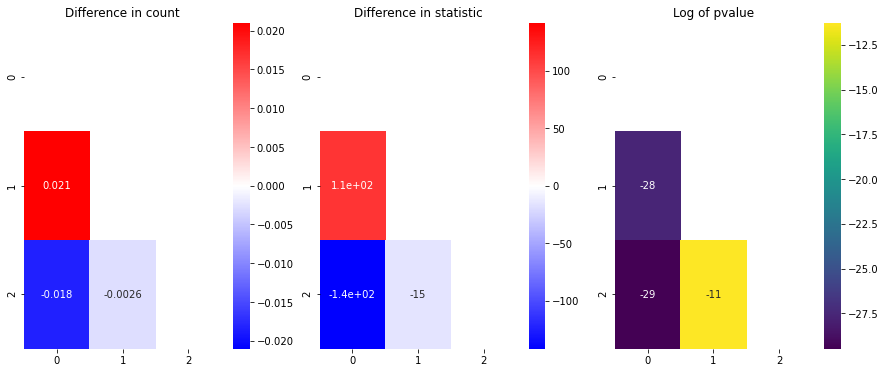

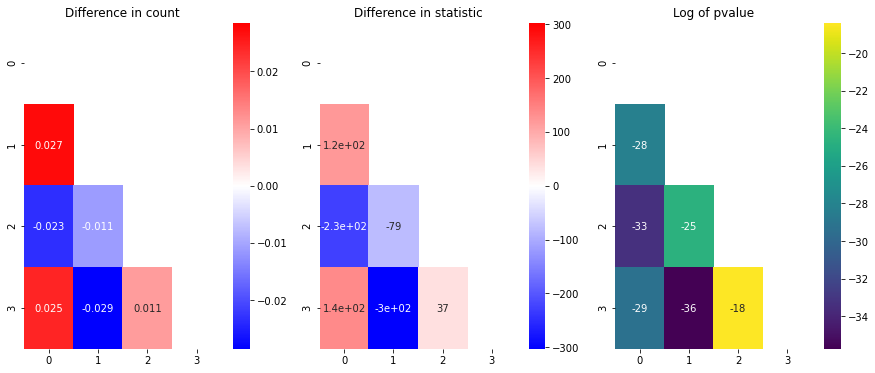

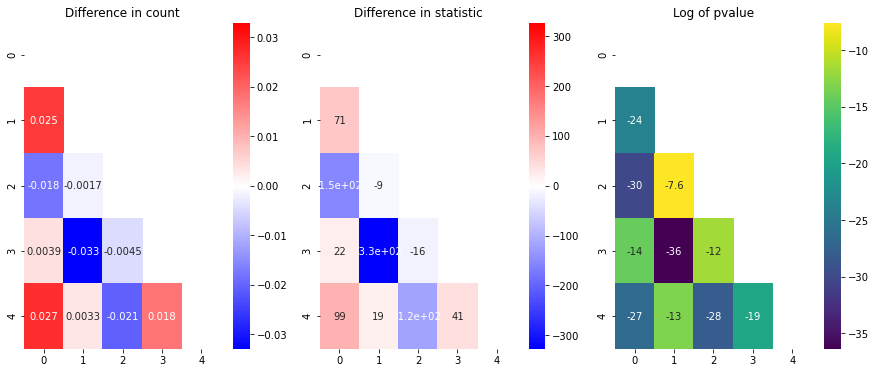

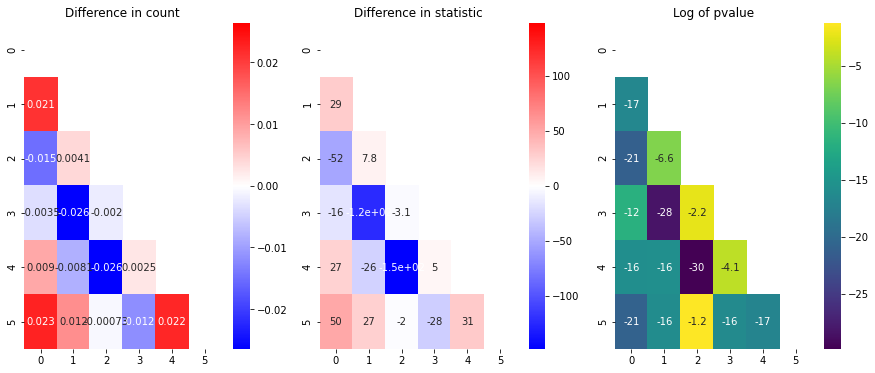

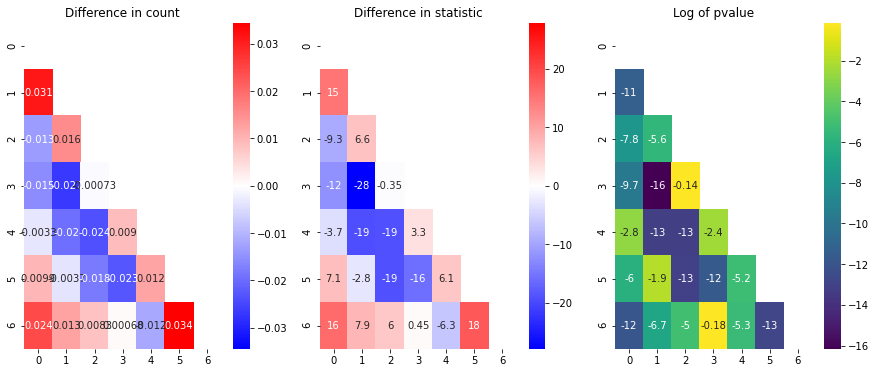

In [16]:
s, p, d = compute_ostt(bcounts, column_bcounts)
plot_ostt(s, p, d, 5, "ttest_percent")